# National School Lunch Programm


***Author***: Fabian Georgi (s0563263) <br>
***Date***: 2018-11-15 <br>
***Location***: @Matthias' home x)


## Notes 

Für mich normalo auf deutsch: Hier möchte ich die Partizipanten für das National School Lunch Programm in Verbindung mit Obesity oder vielleicht auf Poverty setzen. Dabei möchte ich erstmal folgende Ziele erreichen:
- Daten in richtige Form bringen/Selektieren (`✅Date: 2018-11-15`)
- selektierte Daten ausgeben (`✅Date: 2018-11-15`)
- mit Obesity mergen (`✅Date: 2018-11-15`)
- lineare Interpolationsfunktion schreiben, damit fehlende Jahre sinnvoll gemerged werden können ( ❌)


LET'S GO

## Importieren der Libraries/Frameworks

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Festlegen der Dateipfade

In [32]:
# File pathes for quick adjustment if places or directories change.
path_input = '00_data_input'
path_temp = '01_data_temp'
path_inter = '02_data_intermediate'
path_output = '03_data_output'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_lunch = os.path.join(path_inter, 'lunch_refined_data.csv')

## Extraktion der relevanten Daten

>**Initial Dataframe**  
>We use data provided by:
>**United States Department of Agriculture**  
>https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version  
>This data is provided as an Excel file with multiple sheets.
>The values of the food atlas are collected for each US county which are identified by their FIPS-code.

In [33]:
# Load the health table from the food atlas data and extract the columns dealing with obesity.
df_assistance = pd.read_excel(path_atlas, sheet_name='ASSISTANCE')
df_lunch = df_assistance[['FIPS', 'PCT_FREE_LUNCH09', 'PCT_FREE_LUNCH14', 'PCT_REDUCED_LUNCH09', 'PCT_REDUCED_LUNCH14']].copy()

# Show some information about the dataframe we extracted so far.
print('{:<25} {:d}'.format('Number of entries:', len(df_lunch.index)))
df_lunch[:5]

Number of entries:        3143


,FIPS,PCT_FREE_LUNCH09,PCT_FREE_LUNCH14,PCT_REDUCED_LUNCH09,PCT_REDUCED_LUNCH14
0,1001,32.006749,NaN,8.217547,NaN
1,1003,33.216055,36.756439,8.160408,5.082364
2,1005,68.245839,63.931806,3.713188,3.436335
3,1007,50.278552,54.334227,11.197772,9.115282
4,1009,39.681098,44.987980,9.082652,8.090310


In [34]:
# Rename the columns to allow for better reading and referencing in the future.
df_lunch.rename(columns={'FIPS': 'county_fips', 'PCT_FREE_LUNCH09':'PCT_free_lunch_2009','PCT_FREE_LUNCH14':'PCT_free_lunch_2014','PCT_REDUCED_LUNCH09':'PCT_reduced_lunch_2009', 'PCT_REDUCED_LUNCH14':'PCT_reduced_lunch_2014'}, inplace=True)

# Add some colums of values (average, change) derived directly from the ones that where in the atlas.
df_lunch['PCT_free_lunch_average'] = round((df_lunch['PCT_free_lunch_2009'] + df_lunch['PCT_free_lunch_2014'])/2, 3)
df_lunch['PCT_free_lunch_change'] = round(df_lunch['PCT_free_lunch_2014'] - df_lunch['PCT_free_lunch_2009'],3)
df_lunch['PCT_reduced_lunch_average'] = round((df_lunch['PCT_reduced_lunch_2009'] + df_lunch['PCT_reduced_lunch_2014'])/2, 3)
df_lunch['PCT_reduced_lunch_change'] = round(df_lunch['PCT_reduced_lunch_2014'] - df_lunch['PCT_reduced_lunch_2009'], 3)

# Rearranging the columns
df_lunch = df_lunch.reindex_axis(['county_fips','PCT_reduced_lunch_2009','PCT_reduced_lunch_2014','PCT_reduced_lunch_average','PCT_reduced_lunch_change','PCT_free_lunch_2009','PCT_free_lunch_2014','PCT_free_lunch_average','PCT_free_lunch_change'], axis=1)

df_lunch[:5]

,county_fips,PCT_reduced_lunch_2009,PCT_reduced_lunch_2014,PCT_reduced_lunch_average,PCT_reduced_lunch_change,PCT_free_lunch_2009,PCT_free_lunch_2014,PCT_free_lunch_average,PCT_free_lunch_change
0,1001,8.217547,NaN,NaN,NaN,32.006749,NaN,NaN,NaN
1,1003,8.160408,5.082364,6.621,-3.078,33.216055,36.756439,34.986,3.540
2,1005,3.713188,3.436335,3.575,-0.277,68.245839,63.931806,66.089,-4.314
3,1007,11.197772,9.115282,10.157,-2.082,50.278552,54.334227,52.306,4.056
4,1009,9.082652,8.090310,8.586,-0.992,39.681098,44.987980,42.335,5.307


**Saving the data for later use**

In [35]:
df_lunch.to_csv(path_lunch)

## Plotten der Daten

In [36]:
def plot_distribution(title, series, bins, color):
    sns.set_color_codes()
    sns.set(font_scale=1.4)
    plt.subplots(figsize=(20,8))
    plt.title(title) 
    sns.distplot(series.dropna(), bins=bins, color=color)

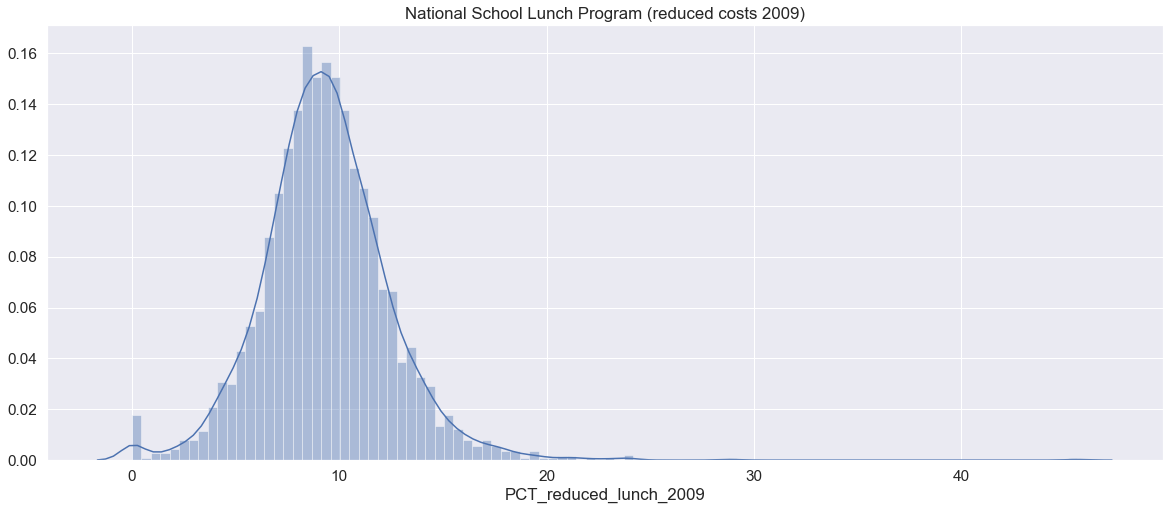

In [55]:
plot_distribution('National School Lunch Program (reduced costs 2009)', df_lunch['PCT_reduced_lunch_2009'], 100, 'b')

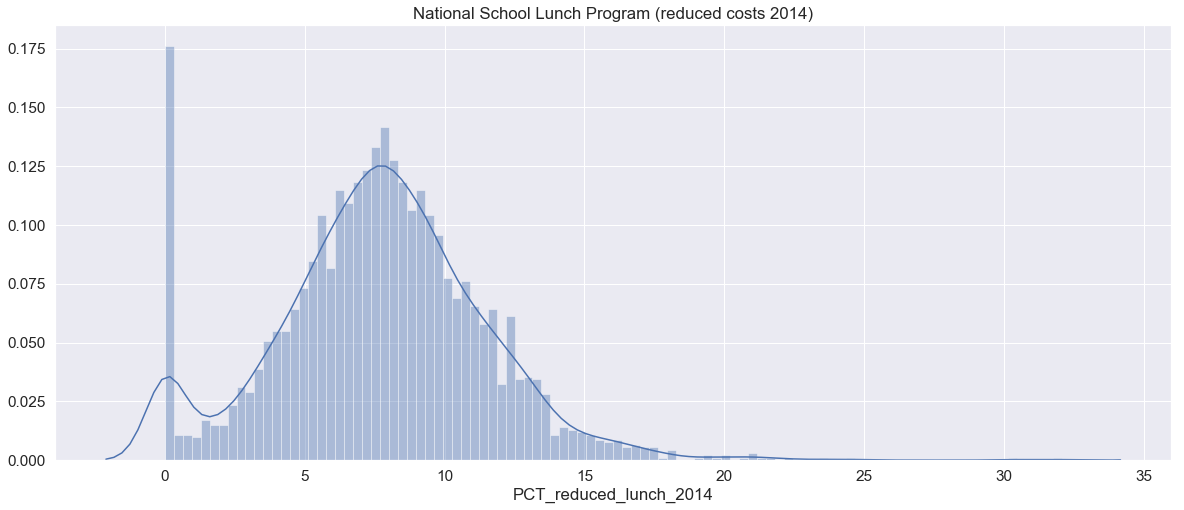

In [56]:
plot_distribution('National School Lunch Program (reduced costs 2014)', df_lunch['PCT_reduced_lunch_2014'], 100, 'b')

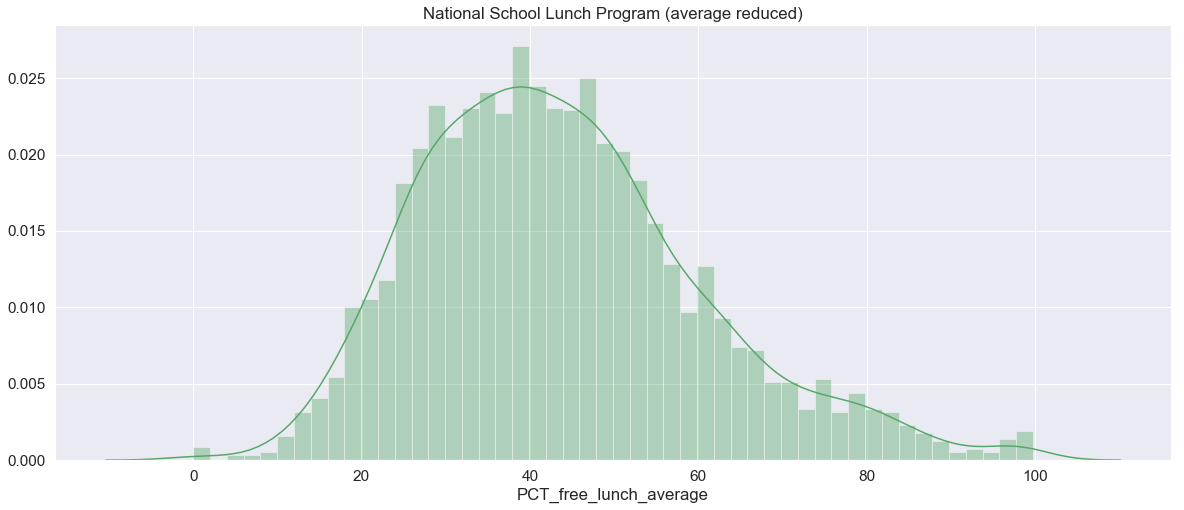

In [57]:
plot_distribution('National School Lunch Program (average reduced)', df_lunch['PCT_free_lunch_average'], 50, 'g')

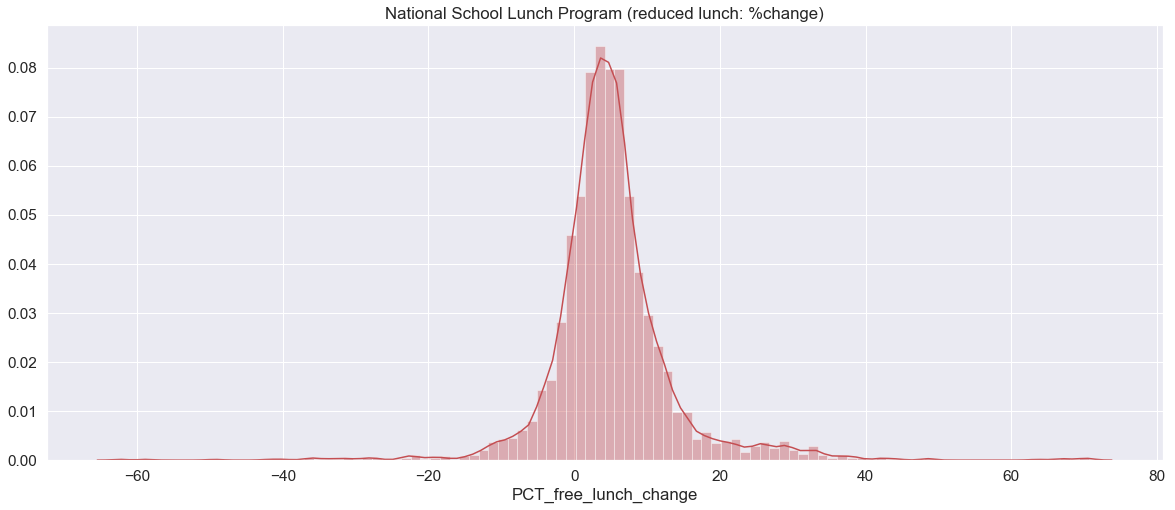

In [58]:
plot_distribution('National School Lunch Program (reduced lunch: %change)', df_lunch['PCT_free_lunch_change'], 100, 'r')

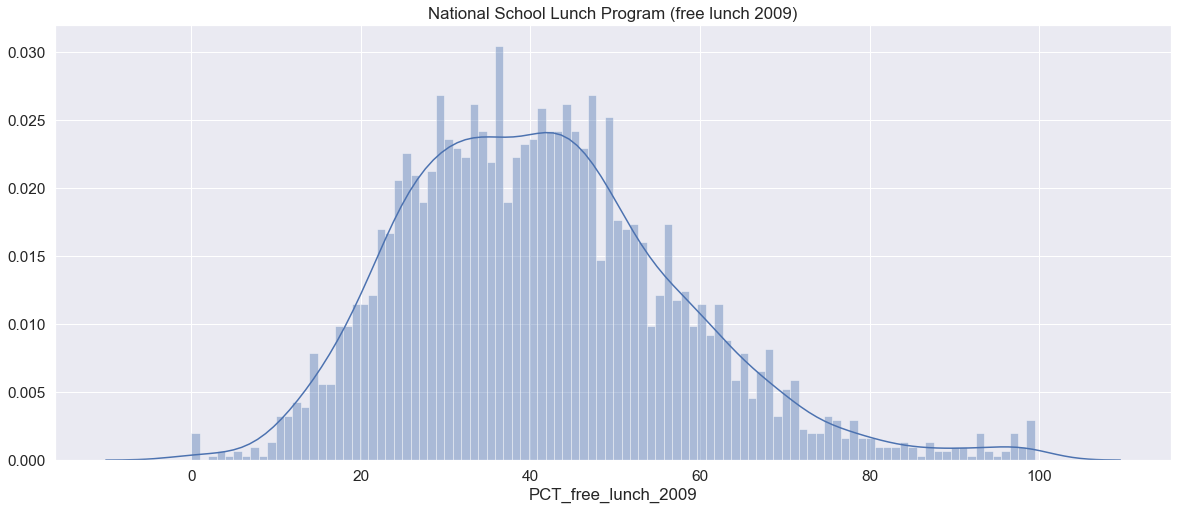

In [59]:
plot_distribution('National School Lunch Program (free lunch 2009)', df_lunch['PCT_free_lunch_2009'], 100, 'b')

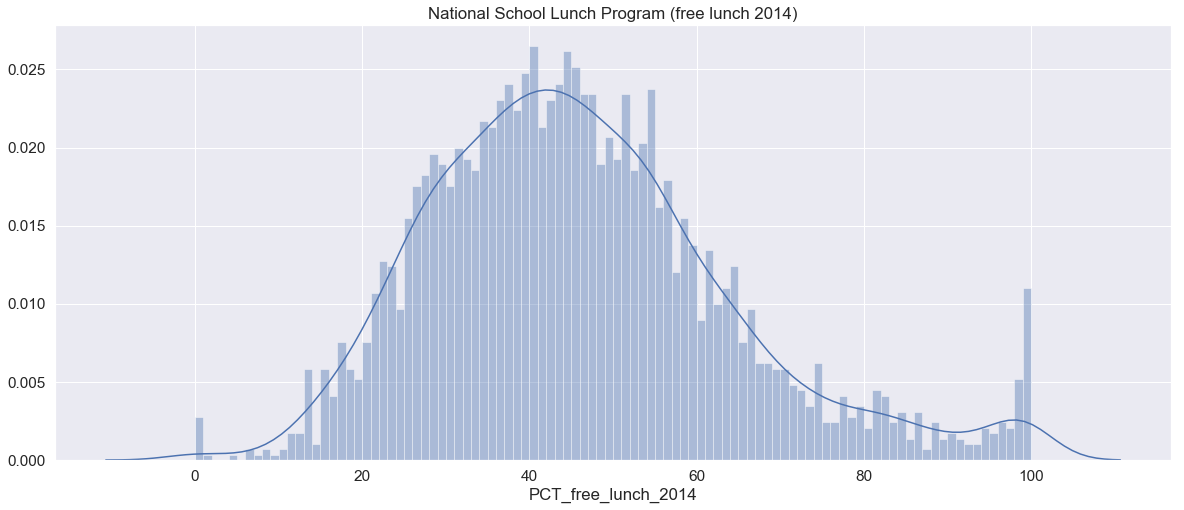

In [60]:
plot_distribution('National School Lunch Program (free lunch 2014)', df_lunch['PCT_free_lunch_2014'], 100, 'b')

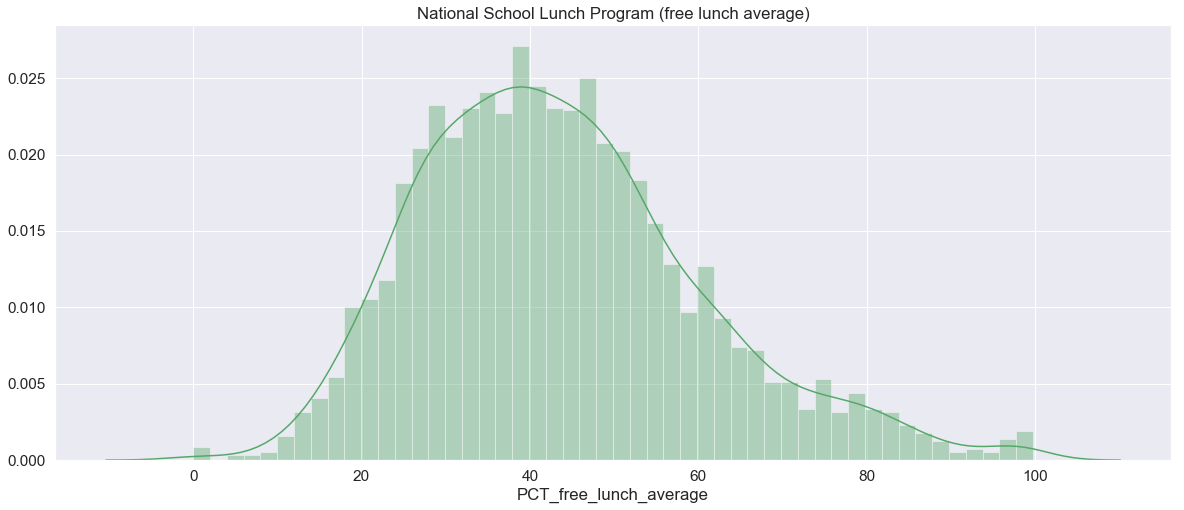

In [61]:
plot_distribution('National School Lunch Program (free lunch average)', df_lunch['PCT_free_lunch_average'], 50, 'g')

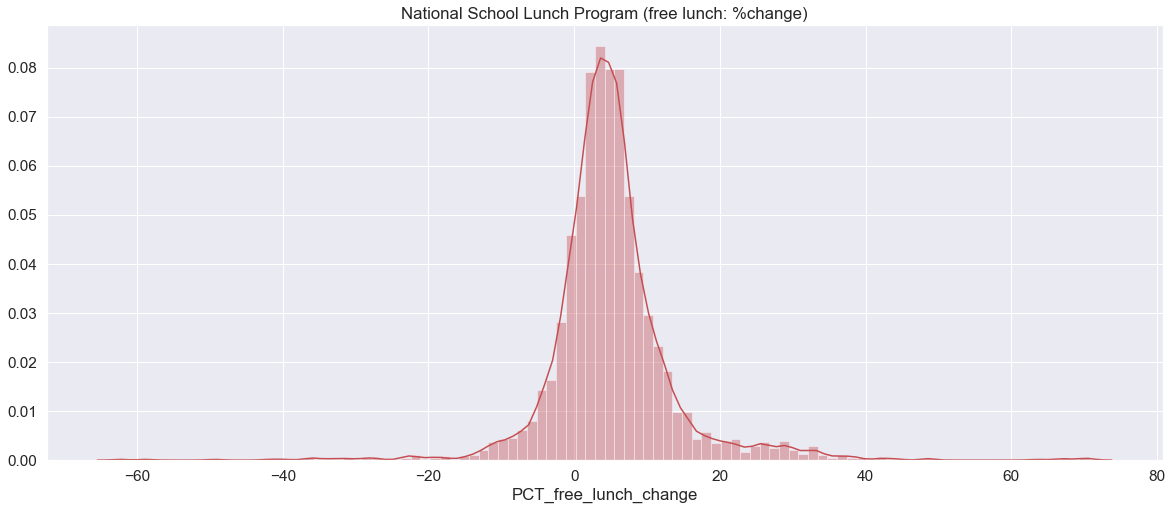

In [62]:
plot_distribution('National School Lunch Program (free lunch: %change)', df_lunch['PCT_free_lunch_change'], 100, 'r')

# Obesity und Lunch

**Importieren/Laden der anderen Dateien**

In [64]:
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')
df_obesity = pd.read_csv(path_obesity)

**Mergen der beiden Datensätze**

In [65]:
df_obese_lunch = df_obesity[['county_fips','PCT_obese_adults_2013']]
df_obese_lunch = df_obese_lunch.merge(df_lunch[['county_fips','PCT_reduced_lunch_2014']], how='inner', on='county_fips')
df_obese_lunch[:4]

,county_fips,PCT_obese_adults_2013,PCT_reduced_lunch_2014
0,1001,34.1,NaN
1,1003,27.4,5.082364
2,1005,44.4,3.436335
3,1007,40.3,9.115282


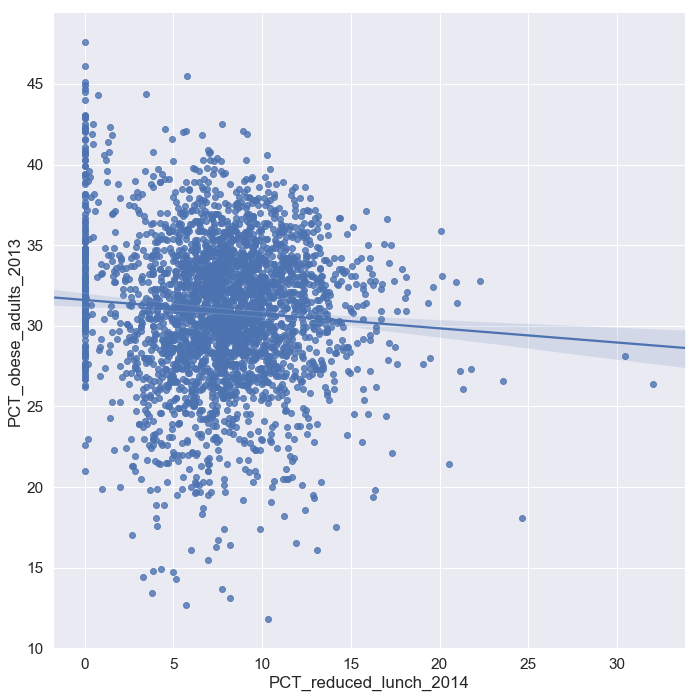

In [67]:
sns.lmplot(x='PCT_reduced_lunch_2014', y='PCT_obese_adults_2013', data=df_obese_lunch, size=10)

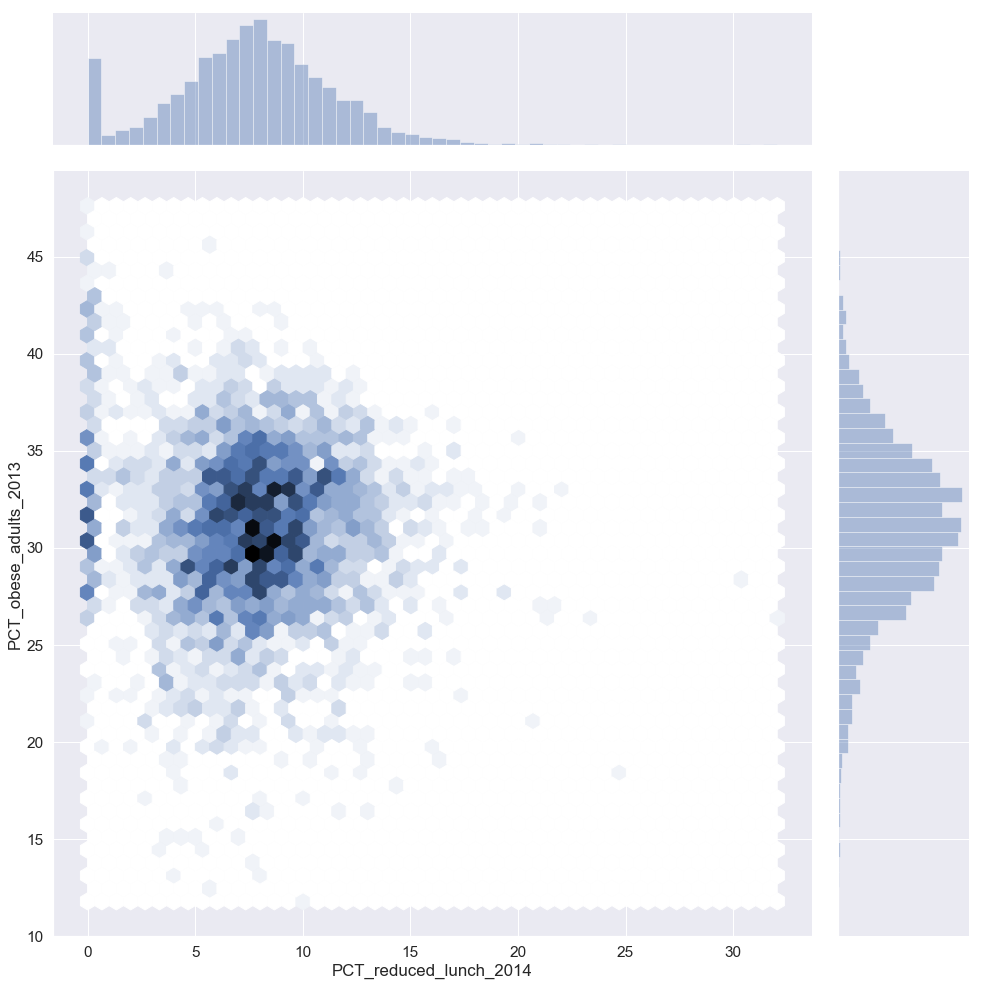

In [69]:
sns.jointplot(x='PCT_reduced_lunch_2014', y='PCT_obese_adults_2013', data=df_obese_lunch, kind='hex', size=14)